# Environment set-up

In [91]:
# import numpy as np
# mat1 = np.array([1,2])
# mat2 = np.array([(1,2), (3,4), (5,6)])
# mat = [mat1, mat2]
# print(mat)
# for i in mat:
#     # check if only one coord, skip if it is
#     print(i.shape)
#     # is 2d array 
#     try: 
#     # tmp = np.squeeze(i)
#     # print(tmp)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
import pathlib
path = pathlib.Path('/content/gdrive/MyDrive/Fyp')
try:
    path.mkdir()
    %cd '/content/gdrive/MyDrive/Fyp'
    ! git clone https://github.com/TanShengRong/FYP-RPI-RF-Sensing
    %cd './FYP-RPI-RF-Sensing/dataset/'
    print('Project folder created in your GoogleDrive')
except FileExistsError:
    %cd '/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/'
    ! git pull
    %cd './dataset/'

/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing
Already up to date.
/content/gdrive/MyDrive/Fyp/FYP-RPI-RF-Sensing/dataset


In [51]:
pwd

'/content/gdrive/My Drive/Fyp/FYP-RPI-RF-Sensing/dataset'

In [52]:
ls

gestureA/  gestureB/  gestureC/  gestureInitial.jpeg  specifications.txt


# Preliminary findings

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

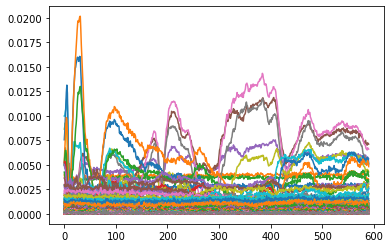

'\n>> ii = ans(:, 1:138);\n>> qq = ans(:, 139:end-1);\n>> iq = ii+j*qq;\n>> imagesc(abs(iq))\n>> plot(abs(iq(1,:)))\n'

In [62]:
df = pd.read_csv("./gestureA/degree0/1.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()
"""
>> ii = ans(:, 1:138);
>> qq = ans(:, 139:end-1);
>> iq = ii+j*qq;
>> imagesc(abs(iq))
>> plot(abs(iq(1,:)))
"""

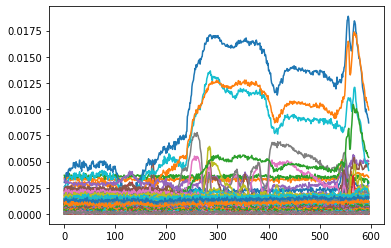

In [63]:
df = pd.read_csv("./gestureA/degree0/2.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()

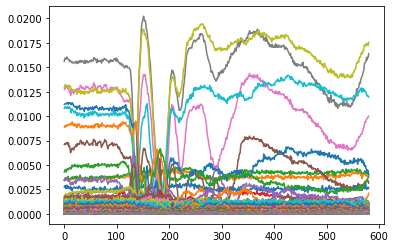

In [64]:
df = pd.read_csv("./gestureA/degree0/3.csv") # shape = duration(millisecond?) x readings
shape = df.shape # (row,col)
tmp = [ _ for _ in range(138)]
ii = df.iloc[:, 0:138]
ii.columns = tmp
qq = df.iloc[:, 138:shape[1]-1 ]
qq.columns = tmp
iq = ii.add(qq, fill_value=None) # fill_value defaults as None
iq = abs(iq)
# iq.plot(kind="hexbin", x=)
iq.plot(legend=None)
plt.show()


Doesn't seem to make much sense...

# Deep Learning

In [93]:
#== MODEL ==#
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, inputs):
        super(Net,self).__init__()
        '''The CNN consists of 10 layers and 
        two input channels given by the real and imaginary part of the spectrogram 
        to provide both amplitude and phase information for gesture recognition. 
        The spectrogram contains 28 Doppler spectra with 128 Doppler filters. 
        The first layer of the CNN is a batch normalisation layer that normalises the mean and variance of the input data. 
        The following two layers of the CNN are convolutional layers, each with a 5×5 receptive field, 32 filters, 
        and a rectified linear unit (ReLU) activation. This two-layered approach first proposed in [15], yields a combined 9×9 receptive field with better performance than a single convolutional layer with a 9×9 receptive field. After a max-pool layer that reduces the dimensions, another pair of convolutional layers and a max-pool is applied. Finally, a flattening layer, a fully connected (FC) layer and a softmax layer is used to provide the gesture classification.
        '''
        self.conv1 = nn.Conv2d(128, 28, 5)
        self.conv2 = nn.Conv2d(128, 28, 5)

        #== pytorch example ==#
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        # self.conv1 = nn.Conv2d(1, 6, 3)
        # self.conv2 = nn.Conv2d(6, 16, 3)
        # # an affine operation: y = Wx + b
        # self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)

    def forward(self,inputs):
        # out = self.inputs # normalise
        out = self.conv1(inputs)
        out = self.ReLU(out)

        return out

In [94]:
ls

gestureA/  gestureB/  gestureC/  gestureInitial.jpeg  specifications.txt


In [99]:
#== DATA LOADING ==#
# def a functn here
import pandas as pd
train = pd.read_csv('./gestureA/degree0/1.csv')
train_tensor = torch.tensor(train.to_numpy())

In [100]:
train_tensor

tensor([[-5.6430e-03, -1.5150e-03, -9.2800e-04,  ...,  7.5000e-05,
          6.4000e-05,         nan],
        [-5.6690e-03, -1.5470e-03, -1.1250e-03,  ..., -1.1000e-05,
          6.2000e-05,         nan],
        [-5.5370e-03, -1.5850e-03, -1.0390e-03,  ...,  8.1000e-05,
          1.7000e-05,         nan],
        ...,
        [-5.3580e-03, -1.4820e-03, -7.3400e-04,  ...,  1.8800e-04,
          1.7300e-04,         nan],
        [-5.1950e-03, -1.3560e-03, -8.4200e-04,  ...,  4.6000e-05,
          5.7000e-05,         nan],
        [-5.1880e-03, -1.1580e-03, -5.7800e-04,  ..., -8.7000e-05,
         -7.0000e-05,         nan]], dtype=torch.float64)